# Finding Hubs
This notebook further explores the structure of the DB1B airline data set. We will examine Coupon data from 2011 Q1 and plot correlations between the ticket counts of origin and destination airports.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import signac
from tqdm import tqdm

# Show more columns so we can see everything
pd.options.display.max_columns = 50

project = signac.get_project()

In [2]:
dtypes = {
    'ItinID': np.int64,
    'MktID': np.int64,
    'SeqNum': np.int8,
    'Coupons': np.int8,
    'Year': np.int16,
    'OriginAirportID': np.int16,
    'OriginAirportSeqID': np.int32,
    'OriginCityMarketID': np.int32,
    'Quarter': np.int8,
    'Origin': str,
    'OriginCountry': str,
    'OriginStateFips': np.int8,
    'OriginState': str,
    'OriginStateName': str,
    'OriginWac': np.int8,
    'DestAirportID': np.int16,
    'DestAirportSeqID': np.int32,
    'DestCityMarketID': np.int32,
    'Dest': str,
    'DestCountry': str,
    'DestStateFips': np.int8,
    'DestState': str,
    'DestStateName': str,
    'DestWac': np.int8,
    'Break': str,
    'CouponType': str,
    'TkCarrier': str,
    'OpCarrier': str,
    'RPCarrier': str,
    'Passengers': np.float32,
    'FareClass': str,
    'Distance': np.float32,
    'DistanceGroup': np.int8,
    'ItinGeoType': np.int8,
    'CouponGeoType': np.int8}

In [3]:
job = project.find_jobs({"year": 2011, "quarter": 1}).next()
df = pd.read_csv(job.fn('Coupon.csv'), usecols=dtypes.keys(), dtype=dtypes)

In [4]:
df.head()

,ItinID,MktID,SeqNum,Coupons,Year,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Quarter,Origin,OriginCountry,OriginStateFips,OriginState,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCountry,DestStateFips,DestState,DestStateName,DestWac,Break,CouponType,TkCarrier,OpCarrier,RPCarrier,Passengers,FareClass,Distance,DistanceGroup,ItinGeoType,CouponGeoType
0,20111716058,2011171605801,1,1,2011,13232,1323201,30977,1,MDW,US,17,IL,Illinois,41,13487,1348701,31650,MSP,US,27,MN,Minnesota,63,X,A,DL,CP,CP,4.0,X,349.0,1,2,2
1,20111716059,2011171605901,1,1,2011,13232,1323201,30977,1,MDW,US,17,IL,Illinois,41,13487,1348701,31650,MSP,US,27,MN,Minnesota,63,X,A,DL,CP,CP,2.0,X,349.0,1,2,2
2,20111716060,2011171606001,1,1,2011,13232,1323201,30977,1,MDW,US,17,IL,Illinois,41,13487,1348701,31650,MSP,US,27,MN,Minnesota,63,X,A,DL,CP,CP,1.0,X,349.0,1,2,2
3,20111716061,2011171606101,1,1,2011,13232,1323201,30977,1,MDW,US,17,IL,Illinois,41,13487,1348701,31650,MSP,US,27,MN,Minnesota,63,X,A,DL,CP,CP,2.0,X,349.0,1,2,2
4,20111716062,2011171606201,1,1,2011,13232,1323201,30977,1,MDW,US,17,IL,Illinois,41,13487,1348701,31650,MSP,US,27,MN,Minnesota,63,X,A,DL,CP,CP,1.0,X,349.0,1,2,2


In [5]:
df_min = df[['Origin', 'Dest']]

In [6]:
airports = set(df_min['Origin'].unique())
airports.update(set(df_min['Dest'].unique()))
airports = list(airports)

In [7]:
counts = {origin: {dest: 0 for dest in airports} for origin in airports}

In [8]:
for t in tqdm(df_min.itertuples(), total=len(df_min)):
    counts[t.Origin][t.Dest] += 1

100%|██████████| 8592669/8592669 [00:17<00:00, 480016.82it/s]


In [9]:
df_counts = pd.DataFrame.from_dict(counts)
df_counts = df_counts.reindex(sorted(df_counts.columns), axis=1)

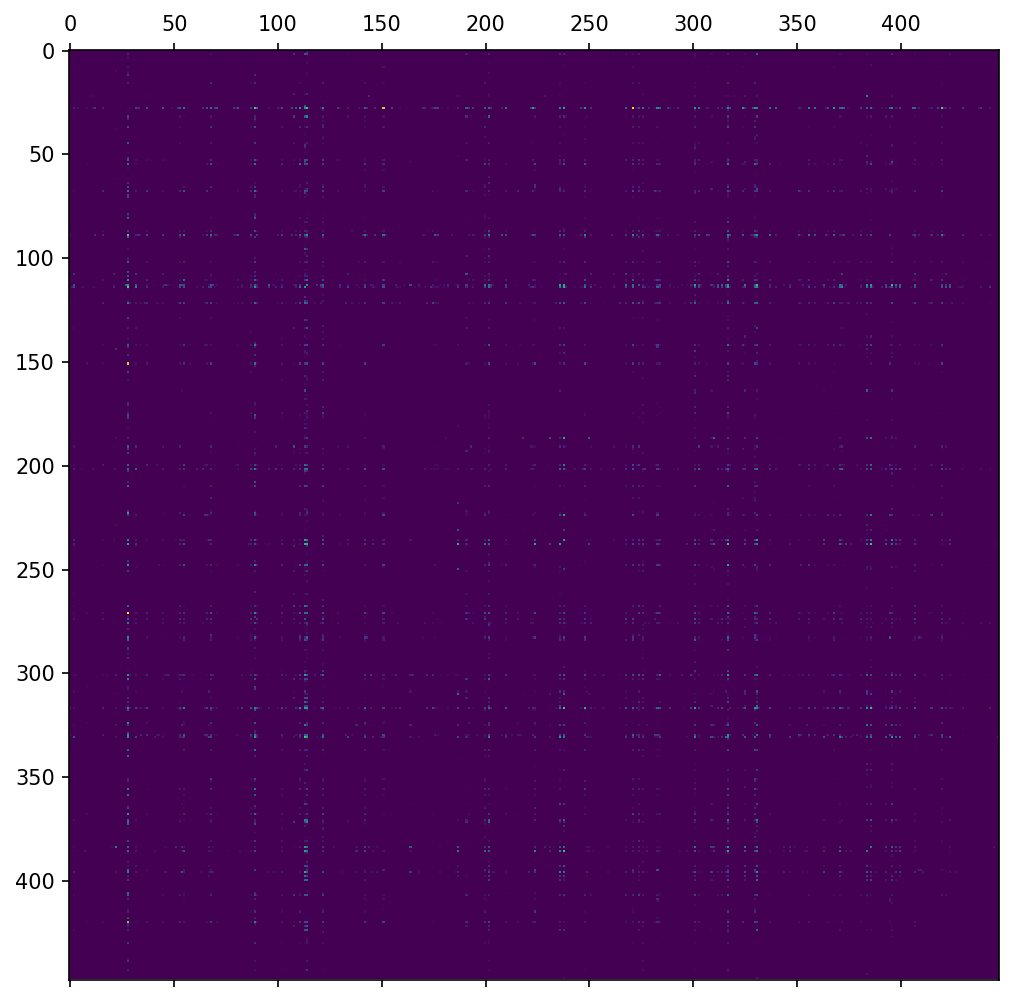

In [10]:
plt.matshow(df_counts)
plt.gcf().set_size_inches(8, 8)
plt.gcf().set_dpi(150)
plt.show()

From the above plot, we observe (unsurprisingly) that most pairs of airports have no traffic between them.

There are between 10 and 40 (hard to tell from this scale) airports that serve as "hubs", shown as bright rows / columns in the matrix.